In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Depth Estimation Pipeline

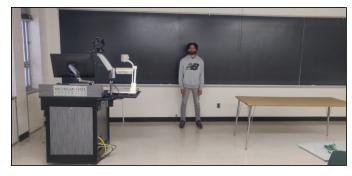

In [10]:
plt.imshow(plt.imread("IMG_20221207_144752.jpg"))
plt.xticks([])
plt.yticks([]);

### Step 1. 

Derive absolute depth estimates from D-Net, this is plotted below in heatmap form:

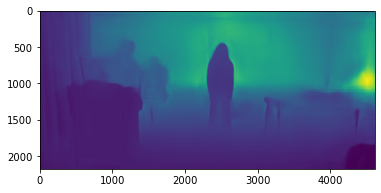

In [14]:
proj_mat = np.load("projector.npy")
plt.imshow(proj_mat)

### Step 2:

Crop the depth map according to the coordinates provided by YOLO. The image plotted below represents the depth maps of the projector and me.

We also use the **median** of these cropped areas to represent the estimated depth of that object.

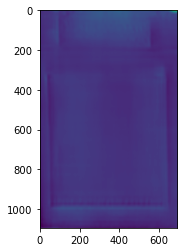

In [15]:
proj = proj_mat[1050:2145, 490:1180]
plt.imshow(proj)
proj_depth = np.median(proj)

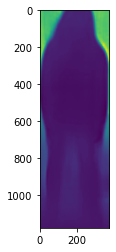

In [16]:
# 2298.906982	505.671753	2675.933105	1681.585815

me = proj_mat[505:1681, 2298:2675]
plt.imshow(me)
my_depth = np.median(me)

### Step 3: 

Estimating Depth: first, we need to figure out the height of the **reference object** (in this case, me) if it was at the same depth of the object which we're trying to estimate the height of (in this case, the projector)

To do this, we use this equation:

$ r_{adjustedheightpixels} = \frac{r_{depth}}{o_{depth}} * r_{heightpixels} $

Where $r$ is the reference object and $o$ is the object we're attempting to estimate the height of.

$r_{adjustedheightpixels}$ and $r_{heightpixels}$ are the reference object heights **in pixels**. The next step is to translate this height into real world measurements. To do this, we need to use the height of the reference object, which is known.


Thus, the final equation for estimating the dimensions of the other object is this:

$o_{heightinches} = \frac{o_{heightpixels}}{r_{adjustedheightpixels}} * r_{heightinches}$

In [17]:
my_depth

9.419211

In [18]:
proj_depth

5.828091

In [19]:
my_height_pixels = 1681-505

In [20]:
my_height_adj = (my_depth / proj_depth) * my_height_pixels

In [21]:
proj_height_pixels = 2145-1050

(proj_height_pixels/ my_height_adj ) * 67

38.600541122349185

~39 inches is the estimated height of the projector. Not bad!

## Ignore from here

In [65]:

# 360.790649	125.927010	479.796906	451.290985	

# me = door_mat[125:451, 360:479]

# me_depth = np.median(me)
# me_depth

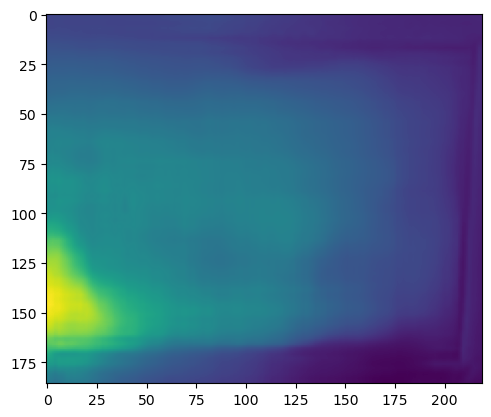

In [55]:
# 369.958649	.876183	.935730	254.226685
board = door_mat[68:254, 500:719]
plt.imshow(board)
board_depth = np.median(board)

## Sparty

In [28]:
sparty_mat = np.load("spartan.npy")

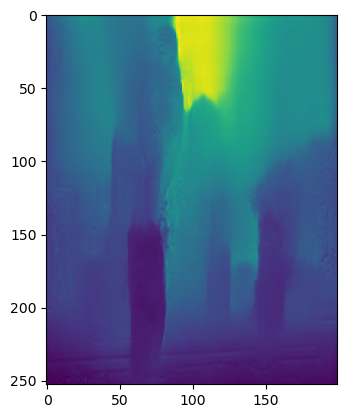

In [29]:
plt.imshow(sparty_mat)

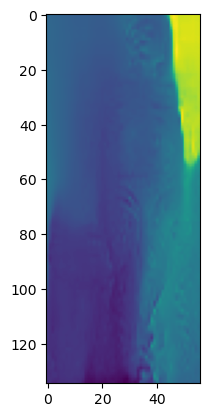

In [31]:
# 44.021549	11.754961	100.608704	146.470459	
sparty = sparty_mat[11:146, 44:100]
plt.imshow(sparty)

In [39]:
sparty_depth = np.median(sparty)
sparty_depth

12.192913

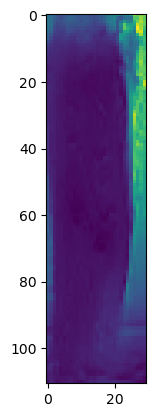

In [35]:
# 56.672928	139.203751	86.364471	250.734680
person_1 = sparty_mat[139:250, 56:86]
plt.imshow(person_1)
person_1_depth = np.median(person_1)

In [38]:
person_1_depth

7.765931

In [42]:
person_1_pixel_height = 250 - 139
sparty_pixel_height = 146 - 11
person_1_adj_height = (person_1_depth / sparty_depth) * person_1_pixel_height

In [43]:
(person_1_adj_height / sparty_pixel_height) * 115

60.22448554966185

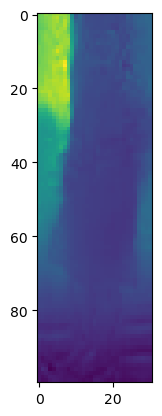

In [36]:
# 136.967667	144.349365	167.543549	244.363113	
person_2 = sparty_mat[144:244, 136:167]
plt.imshow(person_2)
person_2_depth = np.median(person_2)

In [37]:
person_2_depth

8.713428

## Outdoors

In [2]:
mat = np.load("depth.npy")

In [3]:
mat.shape

(2176, 4608)

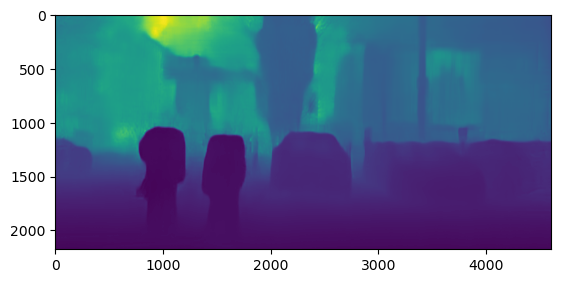

In [4]:
plt.imshow(mat)

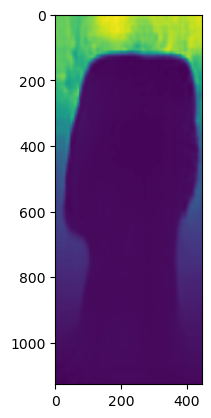

In [5]:
# 1336.007935	996.456177	1783.692017	2123.689453	
sai = mat[996:2123, 1336:1783]
plt.imshow(sai)

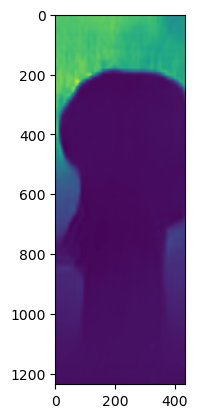

In [7]:
# 763.377014	856.218689	1196.740723	2092.035156
henry = mat[856:2092, 763:1196]
plt.imshow(henry)

In [8]:
np.median(henry)

6.821153

In [9]:
np.median(sai)

7.1468625

In [12]:
# 1988.942993	1092.262207	2738.199463	1711.983643
car = mat[1092:1711, 1988:2738]
np.median(car)

11.231384

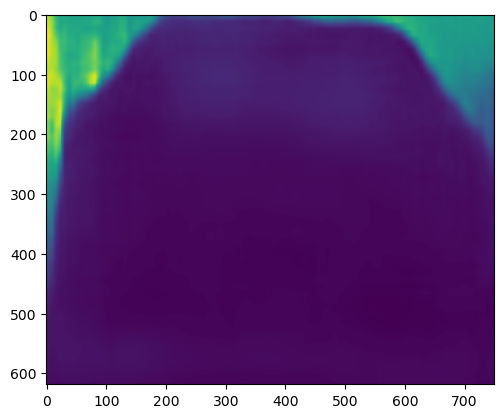

In [19]:
plt.imshow(car)

In [13]:
np.median(sai) / np.median(car)

0.63632965

In [14]:
sai_pixel_height = 2123 - 996

In [24]:
henry_pixel_height = 2092-856


In [22]:
sai_pixel_height_adj = sai_pixel_height * (np.median(sai) / np.median(car))

In [25]:
henry_pixel_height_adj = henry_pixel_height * (np.median(henry) / np.median(car))

In [17]:
car_pixel_height = 1711 - 1092

In [20]:
car_pixel_height

619

In [23]:
(car_pixel_height / sai_pixel_height_adj) * 67

57.83082331980655

In [27]:
(car_pixel_height / henry_pixel_height_adj) * 73

60.196403203001935

In [24]:
np.min(mat)

3.2237344

In [25]:
np.max(mat)

20.79608

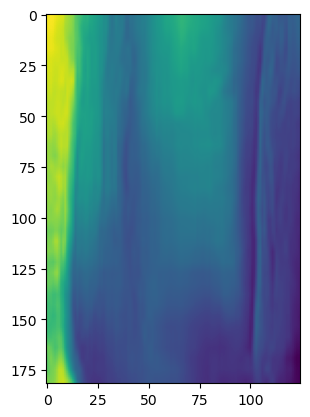

In [52]:
protichi = mat[468:650 , 200:325] / 10
plt.imshow(protichi)

In [53]:
np.median(protichi)

0.60928833

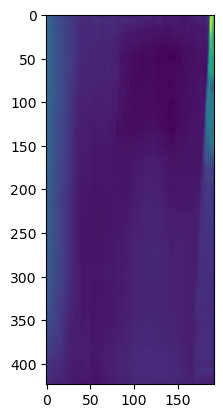

In [41]:
fridge = mat[409:833, 413:605]/10
plt.imshow(fridge)

In [42]:
np.median(protichi)

0.6135335

In [43]:
np.median(fridge)

0.54511607

0.097517905119398

In [20]:
(45 / (1/np.median(protichi))) * 1/np.median(fridge)

50.82703907459717

In [19]:
1/np.median(fridge)

0.11014547497725559